<font size="10">**Customer Segmentation Using K-Means Clustering on Credit Card Data**</font>


**This project involves leveraging the K-Means clustering algorithm to analyze and segment customers based on their credit card usage patterns. Using a dataset with metrics such as balance, purchase behavior, payment frequency, and credit limits, the project identifies distinct customer groups to uncover meaningful insights. These insights can aid in targeted marketing, customer retention strategies, and personalized financial services. The analysis showcases the power of machine learning in understanding customer behavior for business optimization.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [669]:
df = pd.read_csv(r"C:\Users\jinil\Desktop\K-Mean\Credit Card.csv")
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [671]:
df = df.drop(columns=['BALANCE_FREQUENCY', 
                      'PURCHASES_FREQUENCY', 
                      'ONEOFF_PURCHASES_FREQUENCY', 
                      'PURCHASES_INSTALLMENTS_FREQUENCY', 
                      'CASH_ADVANCE_FREQUENCY'])
df

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,1499.00,1499.00,0.00,205.788017,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,300.00,0.00,300.00,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.250000,6


In [672]:
df.shape

(8950, 13)

In [673]:
df.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,592.437371,411.067645,978.871112,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,2136.634782,1659.887917,904.338115,2097.163877,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,39.635000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,361.280000,38.000000,89.000000,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1110.130000,577.405000,468.637500,1113.821139,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_ID                 8950 non-null   object 
 1   BALANCE                 8950 non-null   float64
 2   PURCHASES               8950 non-null   float64
 3   ONEOFF_PURCHASES        8950 non-null   float64
 4   INSTALLMENTS_PURCHASES  8950 non-null   float64
 5   CASH_ADVANCE            8950 non-null   float64
 6   CASH_ADVANCE_TRX        8950 non-null   int64  
 7   PURCHASES_TRX           8950 non-null   int64  
 8   CREDIT_LIMIT            8949 non-null   float64
 9   PAYMENTS                8950 non-null   float64
 10  MINIMUM_PAYMENTS        8637 non-null   float64
 11  PRC_FULL_PAYMENT        8950 non-null   float64
 12  TENURE                  8950 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 909.1+ KB


In [675]:
df.duplicated().sum()

0

In [676]:
missing = pd.DataFrame({
    'Total Missing': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})
missing

,Total Missing,Missing Percentage
CUST_ID,0,0.000000
BALANCE,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
PURCHASES_TRX,0,0.000000
CREDIT_LIMIT,1,0.011173
PAYMENTS,0,0.000000


In [677]:
# AS missing values is less than 5%, so i will remove rows containing missing values
df.dropna(inplace=True)

In [678]:
df.isnull().sum()

CUST_ID                   0
BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

In [679]:
x = df.select_dtypes(exclude=['object'])
x

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1333.28,0.00,1333.28,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,20.90,20.90,0.00,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.250000,6


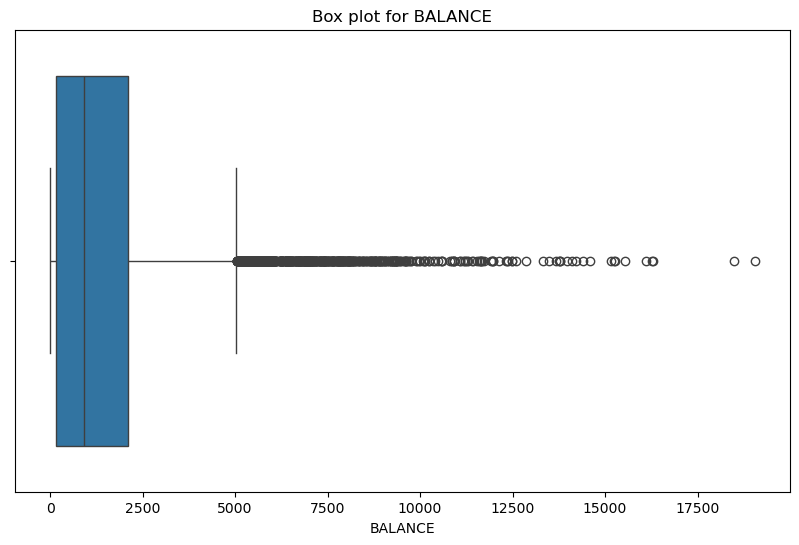

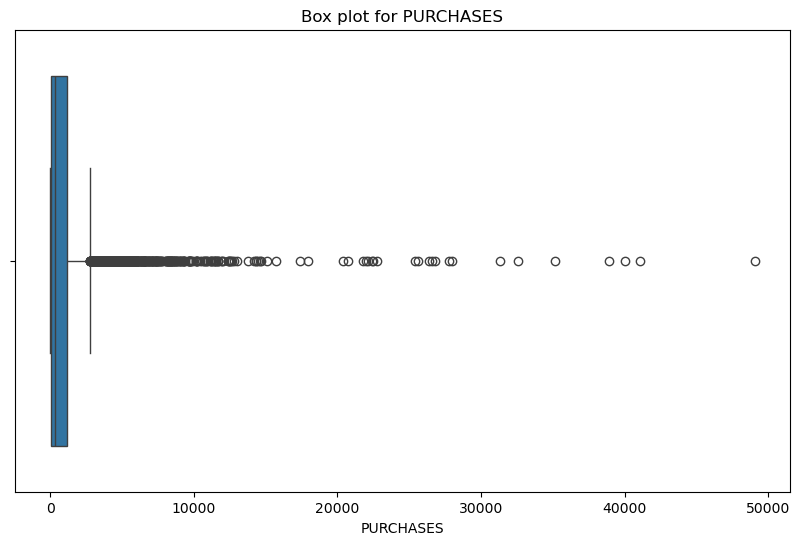

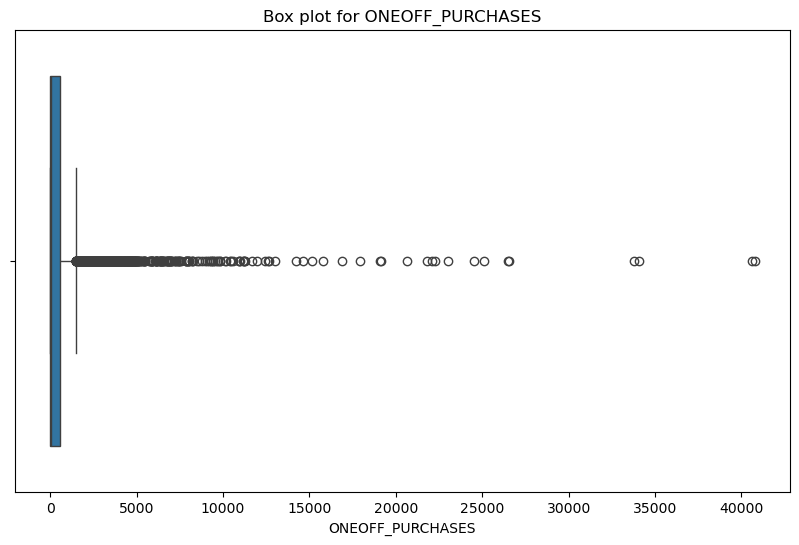

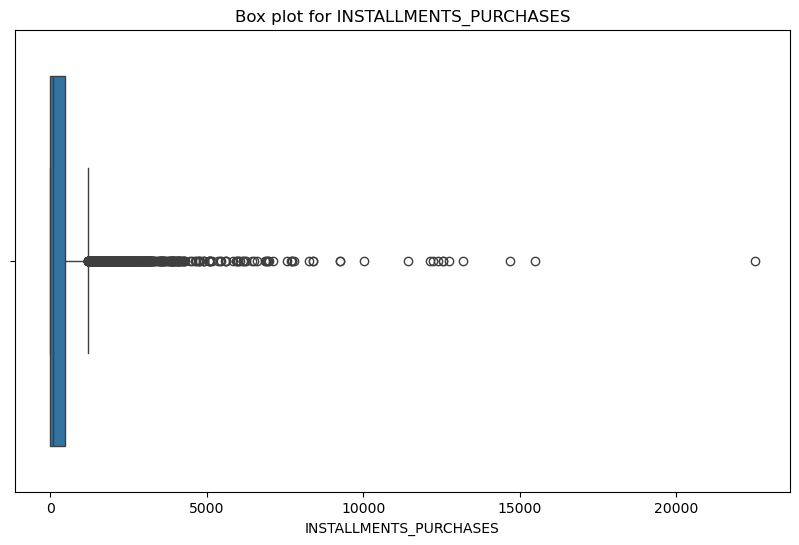

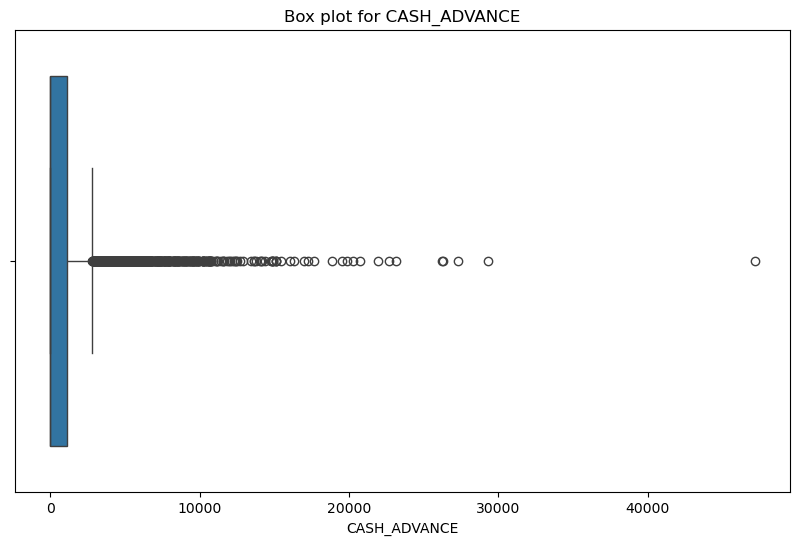

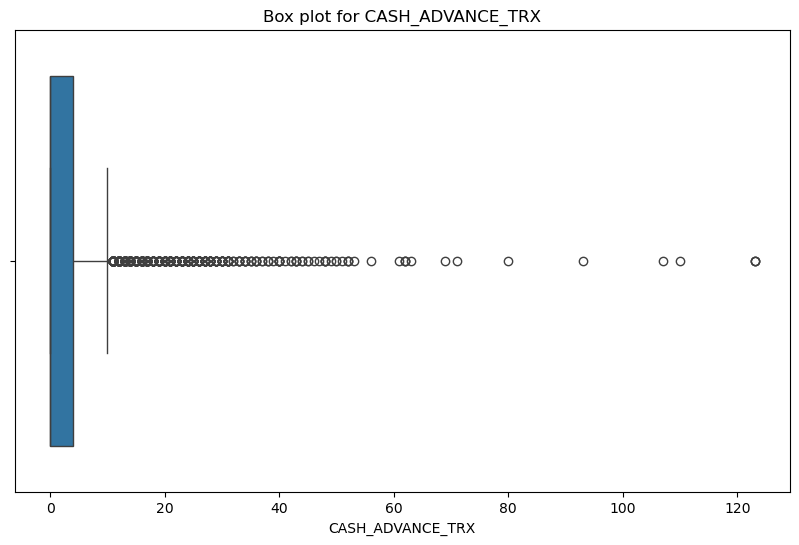

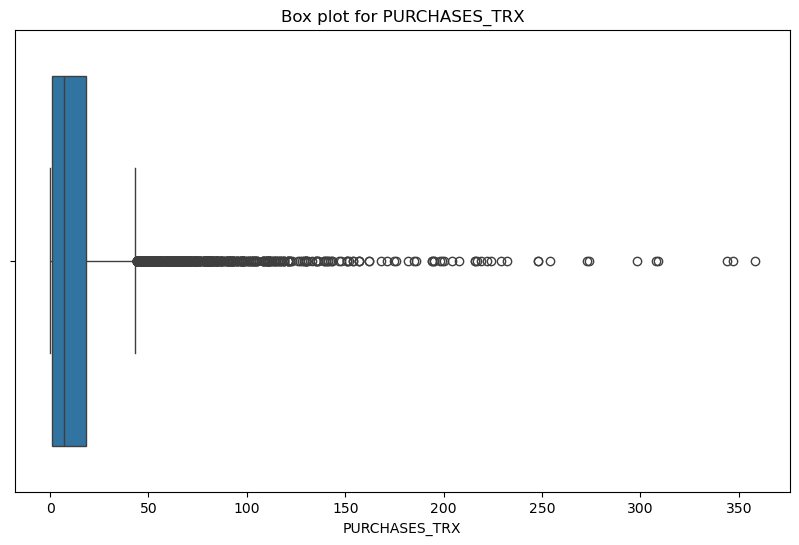

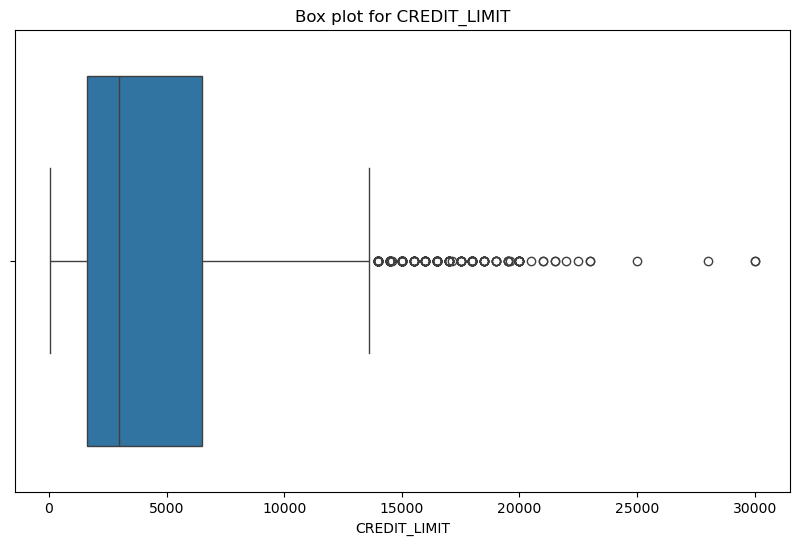

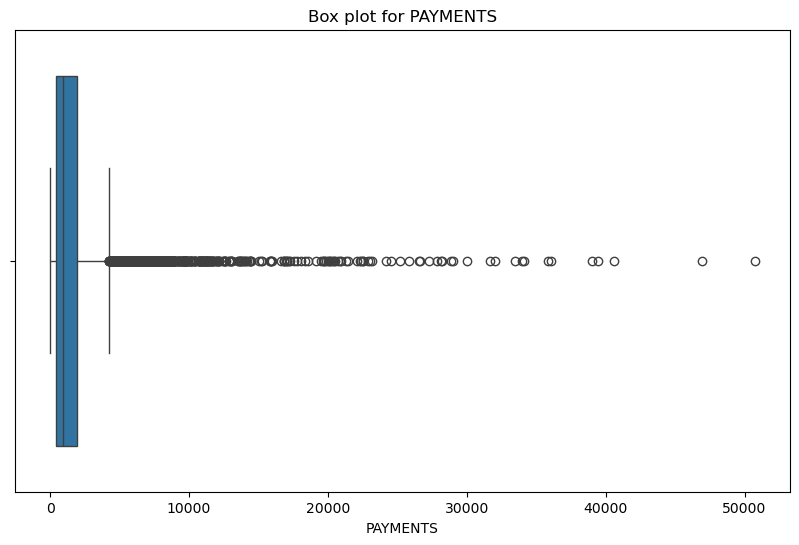

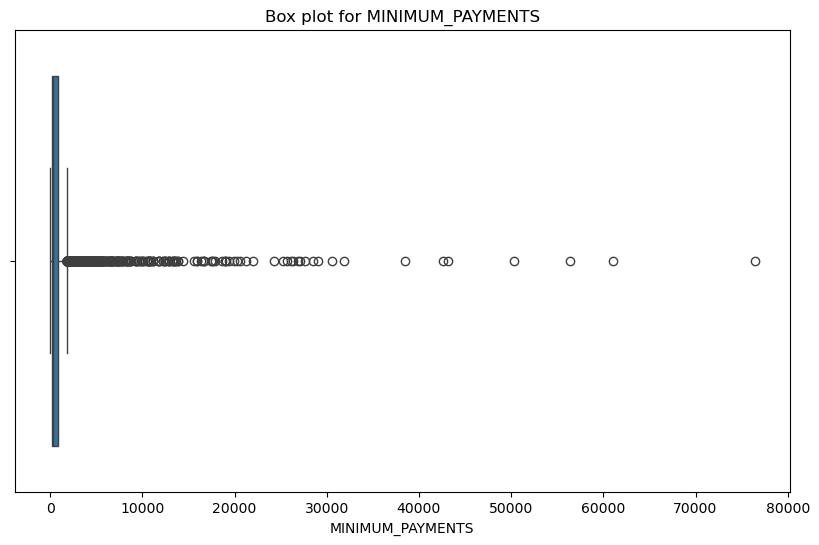

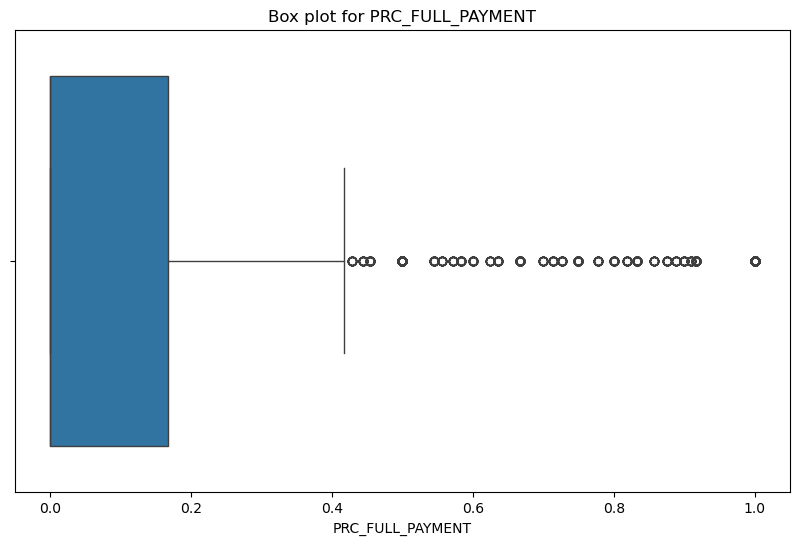

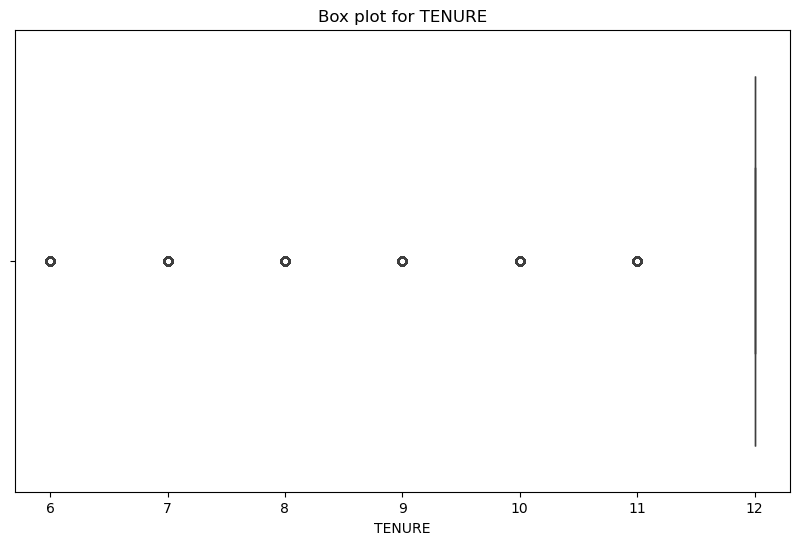

In [680]:
for column in x.columns:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.boxplot(x=x[column])  # Create box plot for the column
    plt.title(f'Box plot for {column}')  # Set title for each plot
    plt.show()

In [681]:
columns_to_exclude = ['PRC_FULL_PAYMENT', 'TENURE']
columns_to_winsorize = []
for col in x:
    if col not in columns_to_exclude:
        columns_to_winsorize.append(col)
columns_to_winsorize

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS']

In [682]:
from feature_engine.outliers import Winsorizer

winsorizer = Winsorizer(capping_method = 'quantiles',
                       tail = 'both',
                       fold = 0.02,
                       variables =columns_to_winsorize )
data = winsorizer.fit_transform(x)

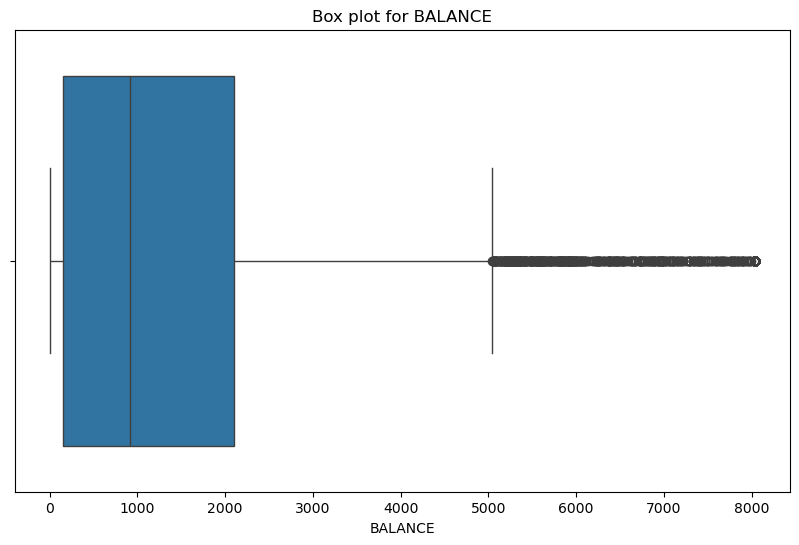

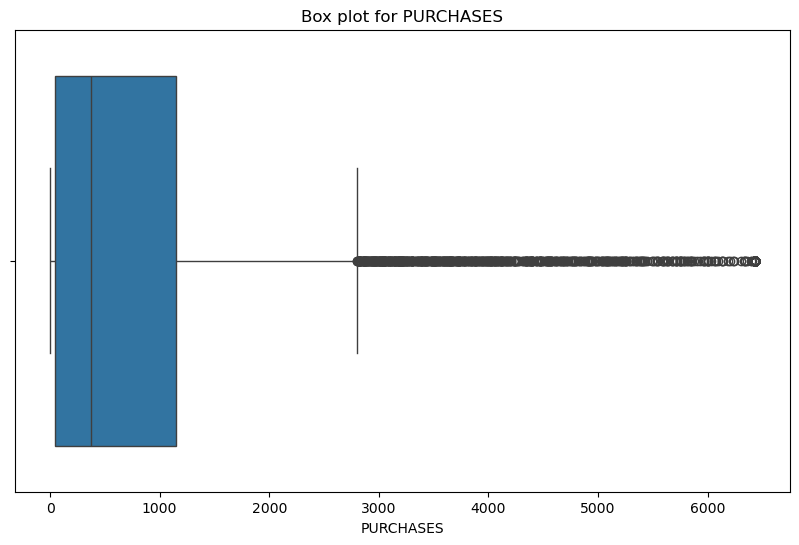

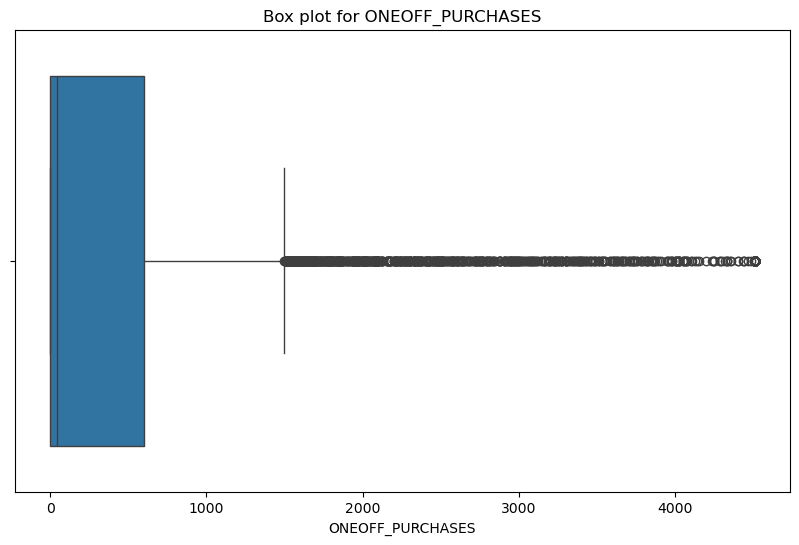

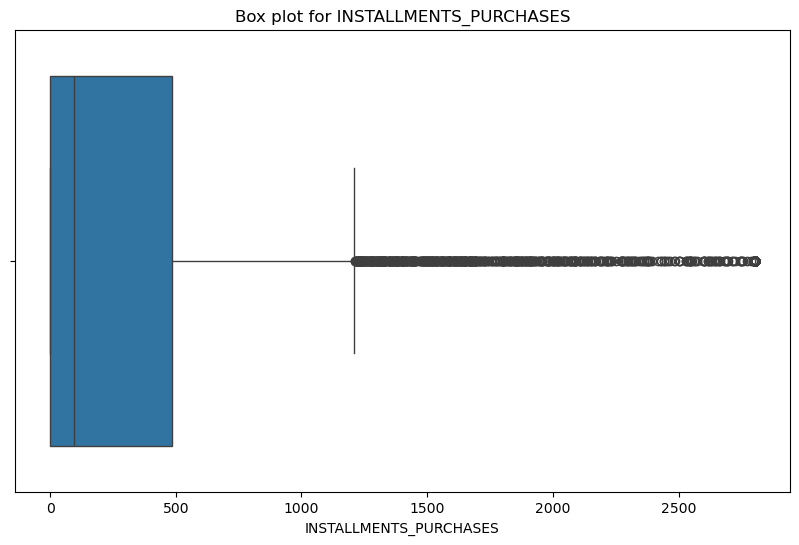

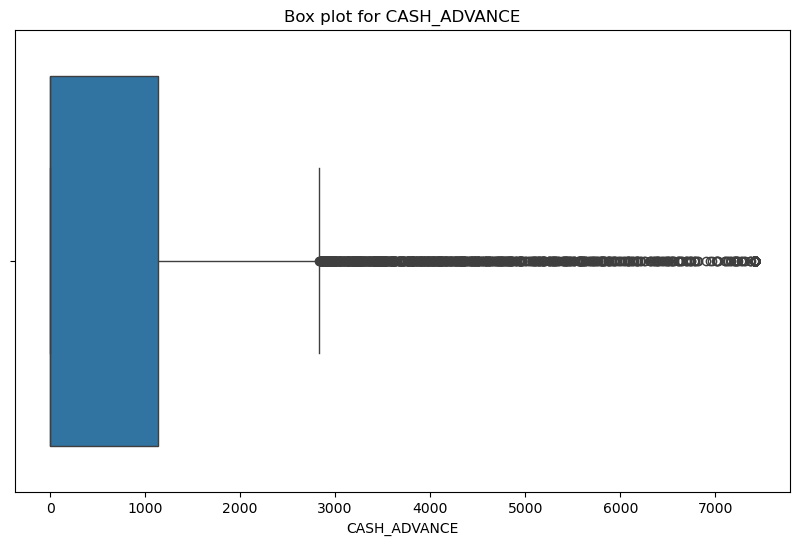

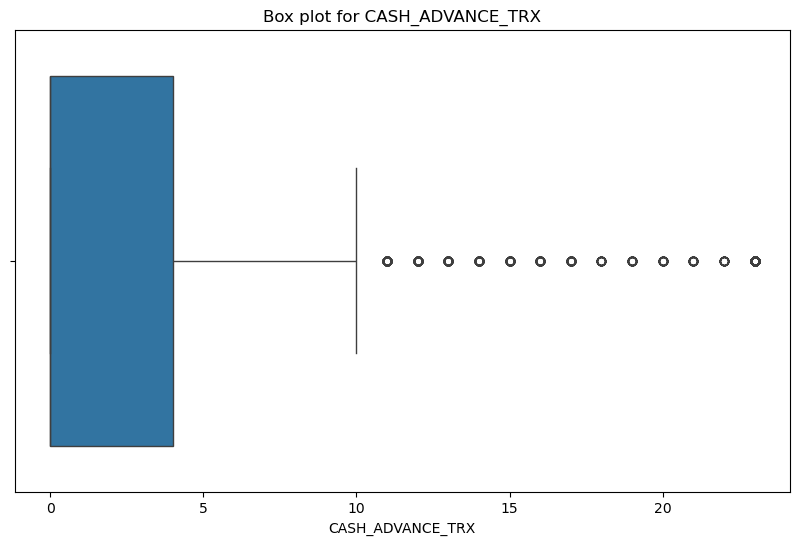

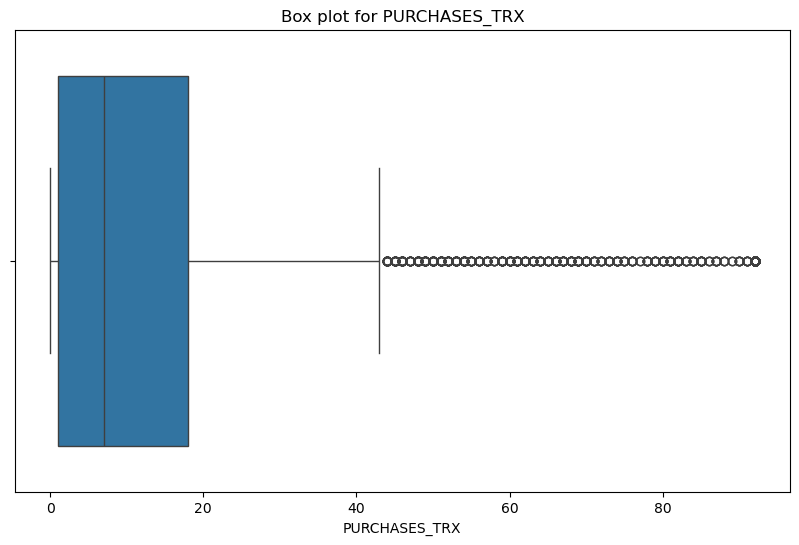

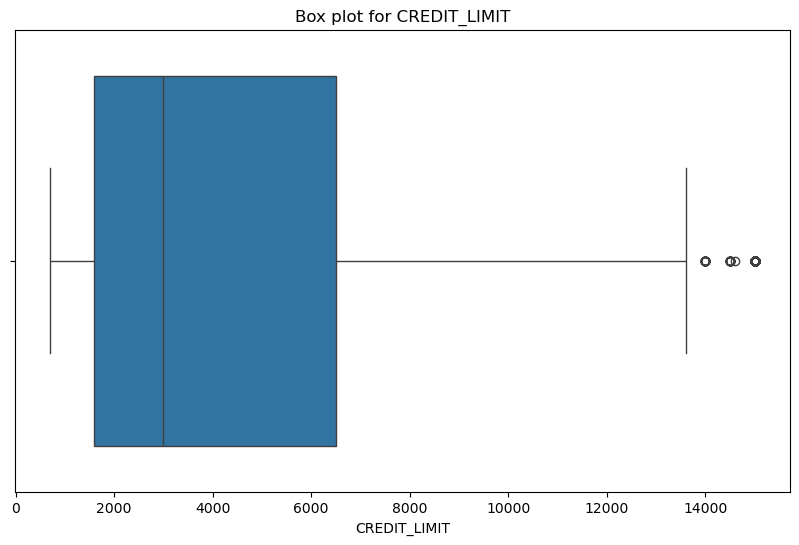

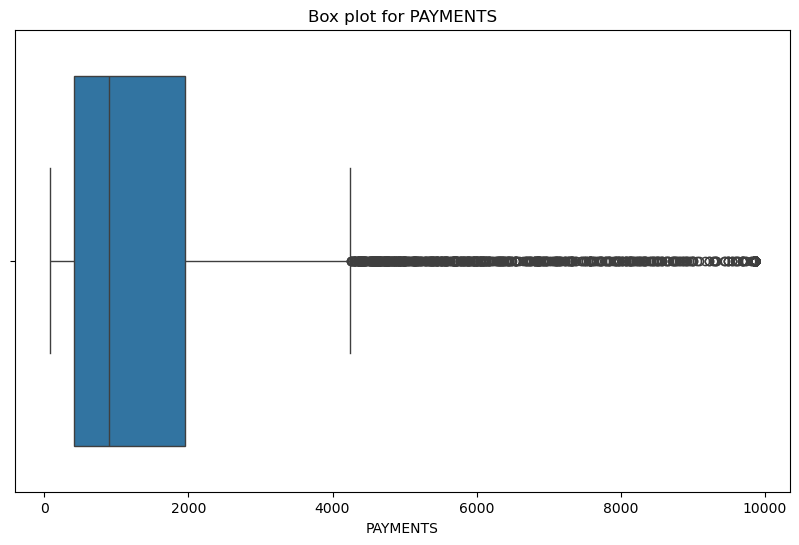

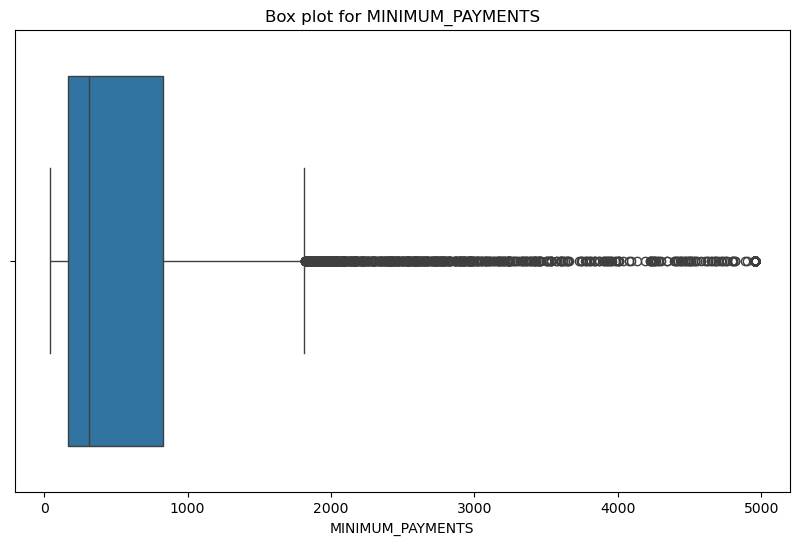

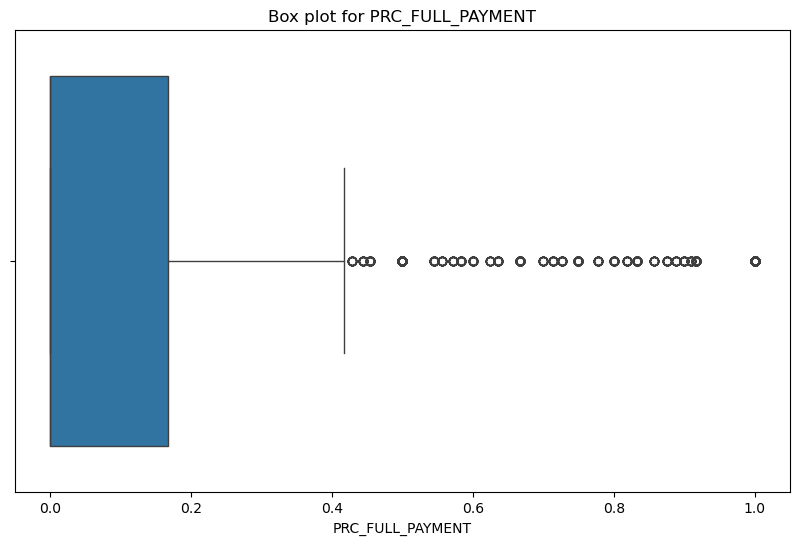

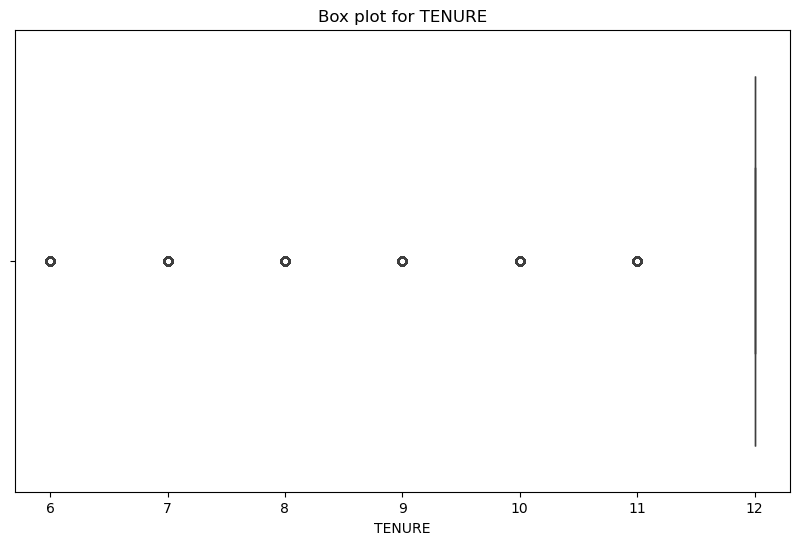

In [683]:
for column in data.columns:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.boxplot(x=data[column])  # Create box plot for the column
    plt.title(f'Box plot for {column}')  # Set title for each plot
    plt.show()

In [684]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[-0.79553389, -0.60044662, -0.53754832, ..., -0.58821595,
        -0.53772694,  0.35518066],
       [ 0.86297623, -0.67005439, -0.53754832, ...,  0.37323882,
         0.21238001,  0.35518066],
       [ 0.4919276 , -0.10591773,  0.26826834, ..., -0.08547334,
        -0.53772694,  0.35518066],
       ...,
       [-0.80471522, -0.5646942 , -0.53754832, ..., -0.64705924,
         0.30614422, -4.22180042],
       [-0.80993017, -0.67005439, -0.53754832, ..., -0.67454014,
         0.30614422, -4.22180042],
       [-0.62147278,  0.12762581,  0.60186354, ..., -0.64100851,
        -0.53772694, -4.22180042]])

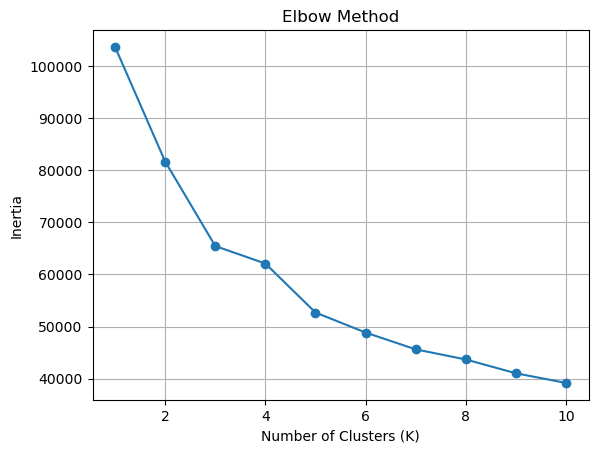

In [685]:
from sklearn.cluster import KMeans
inertia = []
k_range = range(1, 11)  # Try clustering with 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for different k values
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

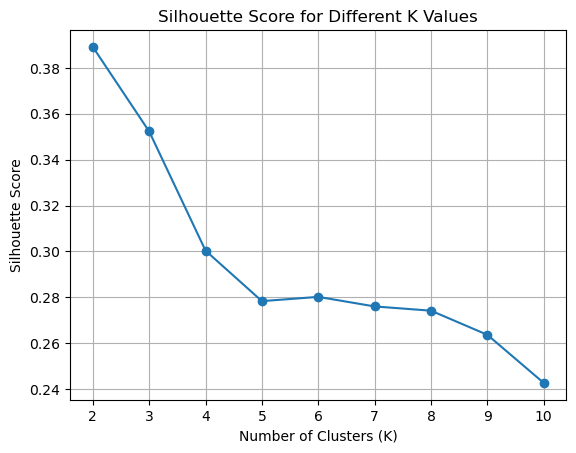

Optimal K (based on silhouette score): 2


In [686]:
# Evaluate Silhouette Scores for different K values
from sklearn.metrics import silhouette_score
sil_scores = []
k_range = range(2, 11)  # Start from 2 because silhouette score is not defined for 1 cluster

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sil_score = silhouette_score(data, kmeans.labels_)
    sil_scores.append(sil_score)

# Plot silhouette scores for different k values
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.grid(True)
plt.show()

# Print the highest silhouette score and corresponding K
best_k = k_range[np.argmax(sil_scores)]
print(f"Optimal K (based on silhouette score): {best_k}")

In [687]:
optimal_k = 2  # Change this to the number of clusters you decide based on the elbow method

# Apply K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit_predict(data)


array([1, 0, 1, ..., 1, 1, 1])

In [688]:
df['Cluster'] = kmeans.labels_
df

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,95.40,0.00,95.40,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.00,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,773.17,773.17,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
4,C10005,817.714335,16.00,16.00,0.00,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,C10006,1809.828751,1333.28,0.00,1333.28,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,20.90,20.90,0.00,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1
8945,C19186,28.493517,291.12,0.00,291.12,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8947,C19188,23.398673,144.40,0.00,144.40,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,C19189,13.457564,0.00,0.00,0.00,36.558778,2,0,500.0,52.549959,55.755628,0.250000,6,1


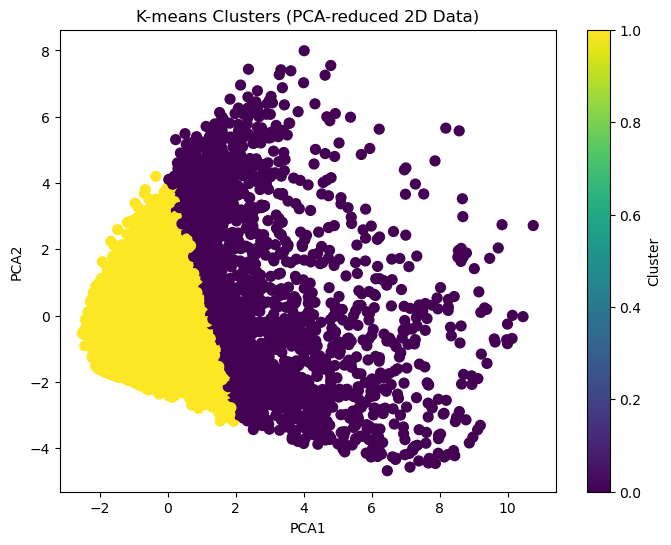

In [689]:
# Reduce dimensions to 2D using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.title('K-means Clusters (PCA-reduced 2D Data)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

In [690]:
from sklearn import metrics
metrics.silhouette_score(x, kmeans.labels_)

0.4631276608498867